
본 튜토리얼은 PSSC(Postech Siam Student Chapter)의 머신러닝 에듀케이션 챕터에서 제공되는 컨텐츠입니다.
상업적으로 무단 배포하실 수 없으며, 문의는 아래의 이메일로 연락주세요.

- 제작자 : 이성헌 (Postech GSAI 박사과정)
- 연락처 : shlee0125@posetech.ac.kr

# [왕초보 머신러닝 파티 시즌 2] ㅣ 2장 머신러닝 프로젝트 처음부터 끝까지

- 목표
    1. 머신러닝 프로젝트 전반의 큰 그림을 계획할 수 있게 된다.
    2. 데이터를 시각화할 수 있게 된다.

## 2.1 실제 데이터로 작업하기



<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Kaggle_logo.png/220px-Kaggle_logo.png">


 
<img src = "https://velog.velcdn.com/images/dacon/post/44249e8b-6c06-4976-b236-d4acfde59916/DACON_logo_sq%20(1).png" width = "300">


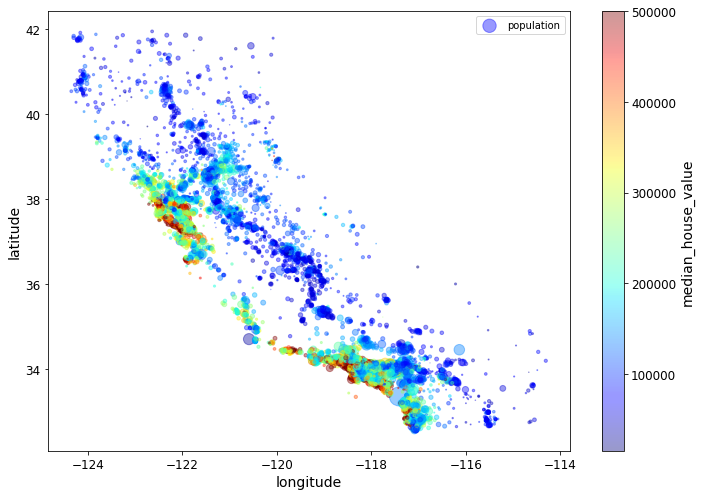

---
## 2.2 큰 그림 보기
----


### 2.2.1 문제정의
- 캘리포니아 인구조사 데이터를 사용해 캘리포니아 주택 가격 모델을 만드는 것 __(Regression)__
----


### 2.2.2 성능 측정 지표 선택
- 우리의 문제는 Regression 문제이므로 일반적으로는 __RMSE (Root Mean Square Error)__ 스코어가 사용됨.

    $RMSE(\mathbf{X},h) = \sqrt{\frac{1}{m}\sum_{i=1}^m\left(h(\mathbf{x}^{(i)})-y^{(i)}\right)^2} $

- 데이터에 이상치가 많아 보이는 경우에는 __MAE (Mean Absolute Deviation)__ 가 사용됨. (L1 norm이 이상치에 덜 민감해서..)

    $MAE(\mathbf{X},h) = \frac{1}{m} \sum_{i=1}^m \lvert h(\mathbf{x}^{(i)})-y^{(i)} \rvert$

----

## 2.3 데이터 가져오기

간단한 함수를 만들어 `housing.csv` 파일을 압축한 `housing.tgz` 파일을 내려받는다.

In [105]:
# Data download 
import os      # https://minimin2.tistory.com/40
import tarfile # https://greeksharifa.github.io/%ED%8C%8C%EC%9D%B4%EC%8D%AC/2020/01/11/zip/
import urllib  # https://bable.tistory.com/796

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)                                    # 파일 다운받을 디렉토리 생성
    tgz_path = os.path.join(housing_path, "housing.tgz")                        # 파일 다운받을 경로 지정
    urllib.request.urlretrieve(housing_url, tgz_path)                           # housing_url에서 tgz_path로 파일 다운받기 요청
    housing_tgz = tarfile.open(tgz_path)                                        # 파일 열기
    housing_tgz.extractall(path=housing_path)                                   # path에 압축 풀기
    housing_tgz.close()                                                         # 파일 닫기

In [106]:
fetch_housing_data()

In [3]:
# Read data through pandas
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [107]:
# Load data
housing = load_housing_data()

__함수형 프로그래밍 (FP)__ , __객체 지향적 프로그래밍 (OOP)__

---
### 2.3.2 데이터 구조 훑어보기

In [108]:
# 데이터의 처음 다섯 행을 확인
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [109]:
# Data information
housing.info()

# total_bedrooms를 잘 보라!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


`housing` 데이터의 특성은 
1. 10개의 feature를 가지고 있다.
2. 20640개의 데이터가 존재한다.
3. `total_bedrooms` 특성은  207개의 `nan` 값이 존재한다.
4. `ocean_proximity`는 category형, 나머지는 수치형 데이터다. 

In [110]:
# ocean_proximity의 정보를 확인해보자
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [111]:
# Numerical data describing
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


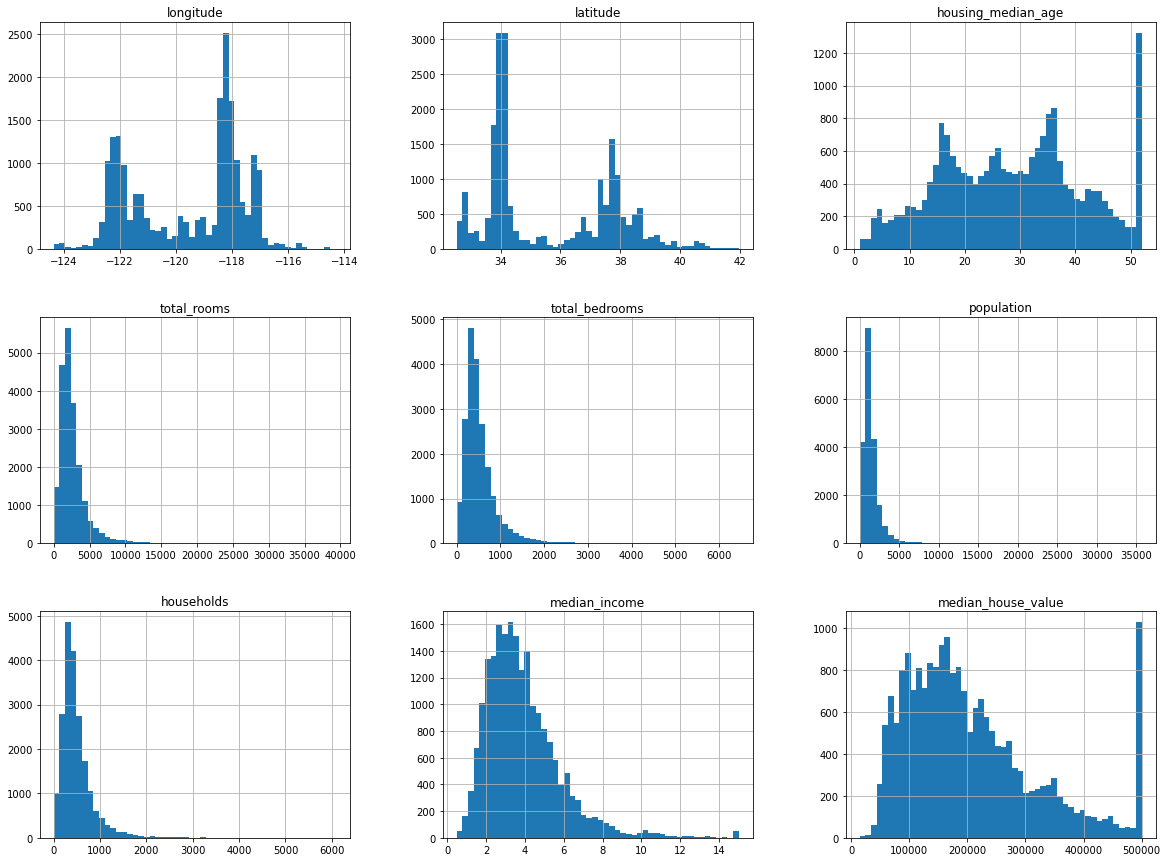

In [112]:
# Histogram
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize = (20,15))
plt.show()

### 데이터의 특성
1. 중간소득`median incom`은 US 달러로 표현되지 않은 듯. 대략 1포인트당 1만달러. 전처리된 데이터라는 뜻. 최댓값과 최솟값을 한정했음.
2. 중간 주택 연도 `housing median age`와 중간 주택 가격 `median house value` 역시 최댓값과 최솟값을 한정함. `median house value`는 target value로 사용딜 것이기 때문에 주의해야함. 왜냐하면, 가격이 train set의 한계값을 넘어서지 않도록 학습될지도 모르기 때문. 만약 50만 달러 이상을 넘어가더라도 정확한 예측값이 필요하다면... 
    - 한곗값 밖의 구역에 대한 정확한 레이블을 구한다.
    - train/test set에서 이런 구역을 제거한다. 
3. feature들의 스케일이 서로 많이 다르다. 
4. 많은 히스토그램이 꼬리가 두껍다. 또 왼쪽보다 오른쪽으로 더 멀리 뻗어있다. 즉, Gaussian에서 많이 멀다. 

----

## 2.3.4 테스트 세트 만들기
 본래는 테스트 셋을 들여다보기 전에 전체 데이터를 파악하고 모델을 선택해두어야 한다. 
 테스트 셋을 먼저 들여다봤다간, 여기서 드러난 패턴에 속아 선택하게된 모델이 일반화 성능에서는 별로 좋지 않을 수 있기 때문. 이런 것을 __데이터 스누핑__ 편향이라고 함.

In [12]:
# Split train & test
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))         # 데이터의 index set을 섞음
    test_set_size = int(len(data) * test_ratio)                 # test_set의 사이즈를 설정
    test_indices = shuffled_indices[:test_set_size]             # 섞인 index set 중 test set 만큼을 떼놓음
    train_indices = shuffled_indices[test_set_size:]            # 섞인 index set 중 train set 만큼을 떼놓음
    return data.iloc[train_indices], data.iloc[test_indices]    # 데이터에서 train index, test index 마스크를 씌우면 끝!

# iloc이 뭐에요?? 
# Dataframe의 행번호로 데이터를 선택하는 것. cf) https://azanewta.tistory.com/34

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

이렇게 데이터 스플릿하는 것의 문제점은 프로그램을 실행할때마다 다른 데이터셋이 만들어진다는 것. 

__해결책__
1. 고정된 난수를 사용하는 것 ex) `np.random.seed(42)`
2. 테스트 셋을 따로 저장해두고 프로그램을 켜면 그것을 불러오는 것.

그렇지만 위 해결책들도 다음번에 업데이트된 데이터셋을 사용하려면 문제가 됨. 
데이터셋을 업데이트한 후에도 안정적인 train/test split을 위한 일반적인 해결책은 샘플의 식별자를 사용하여 test set으로 보낼지 말지 정하는 것. (샘플이 고유하고 변경 불가능한 식별자를 가지고 있다고 가정함.)

In [14]:
from zlib import crc32  # crc32는 데이터의 해쉬값을 얻는 함수...

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 **32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
housing_with_id = housing.reset_index()  # `index` 열이 추가된 데이터프레임으로 반환

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [18]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [19]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


행의 인덱스를 고유 식별자로 사용할 때 새 데이터는 데이터셋의 끝에 추가되어야 하고, 어떤 행도 삭제되지 않아야 한다.
이것이 불가능할 땐 고유 식별자를 만드는 데 안전한 특성을 사용해야 한다.
예를 들어 구역의 위도와 경도는 안정적이라고 보장할 수 있으니 이걸로 ID를 만들면 좋다. 

In [20]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [21]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [26]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20
...,...,...,...,...,...,...,...,...,...,...,...,...
20616,20616,-121.53,39.08,15.0,1810.0,441.0,1157.0,375.0,2.0469,55100.0,INLAND,-121490.92
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND,-121490.94
20618,20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0,INLAND,-121510.94
20632,20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,-121410.74


사이킷런으로 위와 같은 작업을 수행할 수 있다.
`sklearn`의 `train_test_split`은 위에서 구현한 `split_train_test`와 비슷하지만, 두 가지 특징이 더 있다. 
1. 난수 초깃값을 지정할 수 있는 `random_state` 매개변수가 있다.
2. 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있다.

In [22]:
# sklearn train_test_split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [23]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [24]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


데이터가 충분히 크다면 일반적으로 괜찮지만, 그렇지 않다면 random sampling에 sampling bias가 생길 가능성이 크다. 즉, 데이터 전체의 분포가 어떤 계층이 8:2 비율이라면, sample도 그 비율을 유지하도록 해야한다. 이를 __Stratified sampling__ 이라고 한다.

In [113]:
# 계층 분석
housing["income_cat"] = pd.cut(housing["median_income"], bins = [0., 1.5, 3.0, 4.5, 6.,np.inf], labels = [1,2,3,4,5])

# pd.cut() 함수는 카테고리 5개를 가진 소득 카테고리 특성을 만든다. 

<AxesSubplot:>

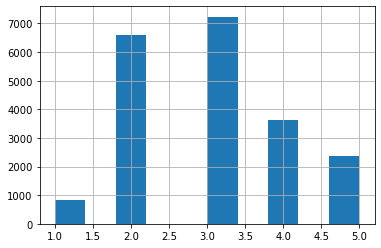

In [114]:
housing["income_cat"].hist()

In [116]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [117]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [118]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace=True)

----

## 2.4 데이터 이해를 위한 탐색과 시각화
 Test set을 떼어놓았는지 확인한 뒤 train set에 대한 탐색을 함.

In [119]:
# Train set을 손상시키지 않기 위해 복사본을 만들어 사용하자.
housing = strat_train_set.copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


### 2.4.1 지리적 데이터 시각화

지리 정보 (위도와 경도)가 있으니 모든 구역을 산점도로 만들어 데이터를 시각화해보자.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

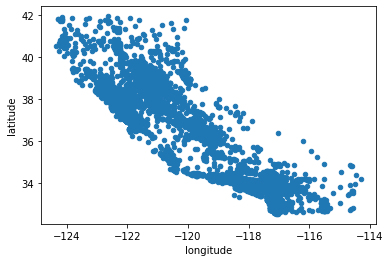

In [120]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

 위 산점도는 캘리포니아 지역을 잘 나타내지만 어떤 특별한 패턴을 찾기는 어렵다.
 `alpha` 옵션을 0.1로 주면 데이터 포인트가 밀집된 영역을 잘 보여준다.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

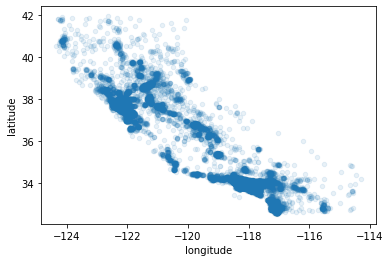

In [123]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

지리적 정보 위에 다양한 정보를 더해보자.

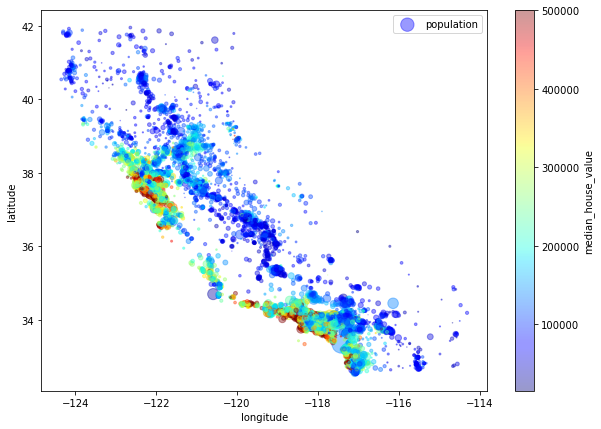

In [33]:
# 주택 가격 나타내기 

# s = 원의 반지름 = 구역의 인구, c = 색상 = 가격

housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
    s = housing['population']/100, label = 'population', figsize = (10,7),  # s는 sphere
    c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True,  # c는 color
    sharex = False)

plt.legend()

 위 데이터를 관찰해보니, 주택 가격은 지리적 요건과 인구 밀도와 매우 관련이 크다는 것을 알 수 있다. 
 물론 북부 지역 해안가는 주택 가격이 그리 높지 않아 간단한 규칙을 적용하기는 어렵다.
 
----

### 2.4.2 상관관계 조사

데이터셋이 너무 크지 않으므로 모든 특성 간의 __표준 상관계수 (Standard correlation coefficient)__ 를 `corr()` 메서드로 쉽게 계산할 수 있다.

In [124]:
# corr matrix 구하기
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [38]:

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

1. Corr coef는 선형적인 상관관계를 보여준다. 1에 가까울수록 비례관계, -1에 가까울수록 반비례 관계를 나타낸다.
2. Corr coef는 비선형적인 상관관계를 보여주지는 않는다. 

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

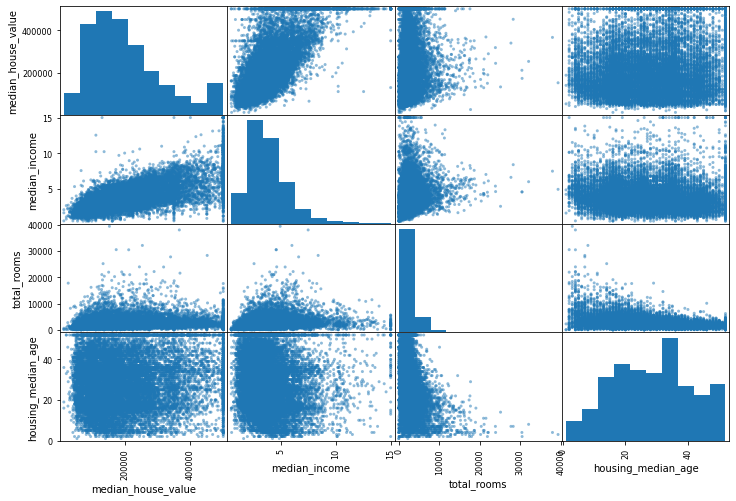

In [125]:
# 산점도 그래프를 그려서 여러 변수간의 상관관계를 시각적으로 관찰할 수 있다.

from pandas.plotting import scatter_matrix


attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

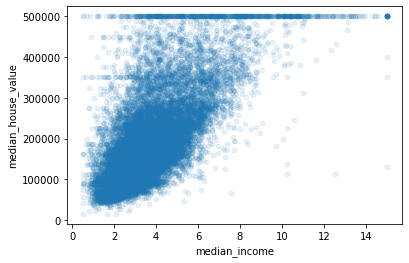

In [40]:
# 가장 유용할 것 같은 특성인 median_income 을 기준으로 확대해보자.

housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

특징 
1. 상관관계가 매우 강함. 위쪽으로 향하는 경향을 볼 수 있으며, 포인트들이 너무 널리 퍼져 있지 않음
2. 제한값 500,000에서 수평선이 보임. 그 외에도 450,000, 350,000, 280,000 에서 수평선들이 보임. 이런 이상한 형태를 학습하지 않도록 해당 구역을 제거하는 것이 좋음.

----

### 2.4.3 특성 조합으로 실험

 여러 특성의 조합을 시도해보고 새로운 특성을 만들어보자.
 예를 들어 특정 구역의 방 개수는 얼마나 많은 가구 수가 있는지 모른다면 그다지 유용하지 않다. 진짜 필요한 것은 가구당 방 개수다. 
 비슷하게 전체 침실 개수도 그 자체로는 유용하지 않다. 즉, 방 개수와 비교하는 게 낫다.
 가구당 인원도 흥미로운 특성 조합일 것이다. 이런 것들을 만들어보자. 

In [126]:
# 기존 특성으로부터 새로운 특성을 만들기

housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [127]:
# 새로운 특성이 추가된 것을 확인할 수 있다.
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [128]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='rooms_per_household'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='bedrooms_per_room'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='bedrooms_per_room'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='bedrooms_per_room'>]],
      dtype=object)

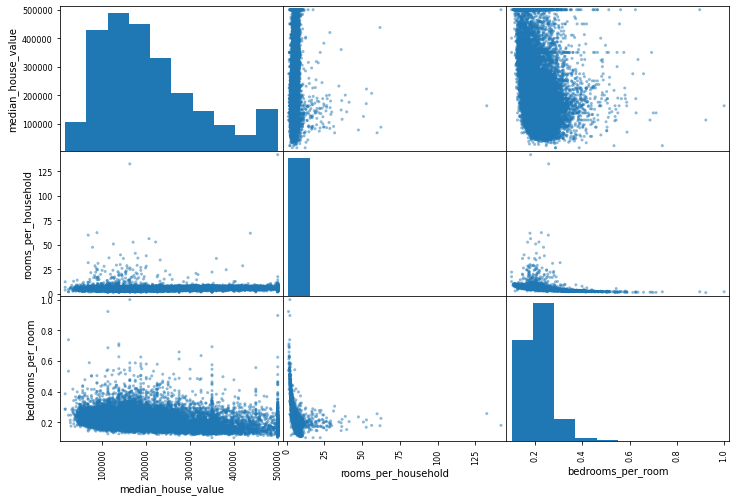

In [129]:
new_attributes = ['median_house_value', 'rooms_per_household', 'bedrooms_per_room']

scatter_matrix(housing[new_attributes], figsize = (12,8))

----


## 2.5 머신러닝 알고리즘을 위한 데이터 준비
__데이터 준비를 자동화해야할 이유__
1. 어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복할 수 있다.
2. 향후 프로젝트에 사용할 수 있는 변환 라이브러리를 점진적으로 구축하게 된다.
3. 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 변환시키는 데 이 함수를 사용할 수 있다.
4. 여러 가지 데이터 변환을 쉽게 시도해볼 수 있고 어떤 조합이 가장 좋은지 확인하는 데 편리하다.

In [130]:
housing = strat_train_set.drop("median_house_value", axis = 1)  # X
housing_labels = strat_train_set["median_house_value"].copy()   # y

----

### 2.5.1 데이터 정제
누락된 특성을 처리할 수 있는 함수를 먼저 만들어보자.
방법은 다음과 같다.
1. 해당 구역을 제거
2. 전체 특성을 삭제
3. 어떤 값으로 채운다 (0, 평균, 중간값 등)

`DataFrame`의 `dropna()`, `drop()`, `fillna()` 메서드를 이용해 쉽게 구현 가능

In [131]:
# 누락된 데이터 정제
housing.dropna(subset = ['total_bedrooms']) # 1 해당 구역을 제거
housing.drop("total_bedrooms", axis = 1)    # 2 전체 특성을 삭제
median = housing['total_bedrooms'].median() # 3 어떤 값으로 채운다
housing['total_bedrooms'].fillna(median, inplace = True)


# 3번을 수행할 때 주의할 점. 계산한 중간값을 저장하는 것을 잊지 말자!
# 나중에 시스템을 평가할 때, 실제 운영될 때 테스트셋과 새 데이터에 써야하기 때문!

사이킷런의 SimpleImputer 함수로 누락된 값을 손쉽게 다룰 수 있다.

In [132]:
# 다시 데이터를 초기화시키고
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()


In [133]:

# Sklearn의 SimpleImputer는 위 과정을 손쉽게 처리해준다.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

# 중간값은 수치형 데이터에만 계산되므로, 카테고리형 특성을 제외한 복사본을 생성한다.
housing_num = housing.drop('ocean_proximity', axis = 1)

#imputer 객체의 fit() 메서드를 사용해 훈련 데이터에 적용시킬 수 있다.
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [134]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [135]:

# 이제 imputer는 학습된 데이터의 각 특성의 중간값을 계산해 그 결과를 statistics_ 속성에 저장한다.
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [54]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [136]:
# 이제 학습된 `imputer` 객체를 사용해 train set에 누락된 값을 학습한 중간값으로 바꿀 수 있다.
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [137]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [138]:
housing_tr.info() # non이 다 사라진 것을 볼 수 있다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


----

### 2.5.2 텍스트와 범주형 특성 다루기

Category형 데이터의 Category(?)에는 '='라는 operator만 존재합니다.
이래서는 머신러닝에 사용하기 적합하지 않습니다.
이를 위해 데이터의 의미는 보존하면서 다른 structure를 추가한 Category로 데이터를 변환할 필요가 있습니다.
Ordinal type은 이때 사용되는 기본적인 Category 입니다.
Ordinal type에는 Order structure가 부여되어 있습니다.

In [139]:
housing_cat = housing[['ocean_proximity']]  # [['column name']]으로 불러오면 DF형식으로
#housing_cat = housing['ocean_proximity']   # ['column name']으로 불러오면 Series 형식으로 불러옴
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [141]:
# Categorical feature를 숫자로 변환
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()      # Category category를 Ordinal category로 ...
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [142]:
ordinal_encoder.categories_ # 학습된 데이터의 Category 목록을 줌. 이 순서로 넘버링함.

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- __Question!__
Category category를 Order structure가 부여된 Ordinal category로 변환했습니다.
이렇게 했을때 어떤 문제가 생길 수 있을까요?

In [143]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
# 데이터가 Scipi sparse matrix 형태로 저장되어 있다.
# Sparse matrix는 0이 아닌 값이 저장된 위치와 그 값만을 저장한 메트릭스다.

  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 1)	1.0
  (16502, 1)	1.0
  (16503, 1)	1.0
  (16504, 1)	1.0
  (16505, 0)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0


In [144]:

# 이를 numpy array로 바꾸려면 .toarray() 메서드를 호출하면 된다.

housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [70]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

----

### 2.5.3 나만의 변환기
사이킷런의 변환기들이 아닌, 자신만의 변환기를 만들고 이를 사이킷런과 잘 호환되게 해보자.

In [146]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# BaseEstimator를 상속한 뒤, fit과 transform이 어떻게 작동할지 설정해주면 된다.
# fit_transform() 메서드는 TransformerMixin을 상속하면 자동으로 생성된다.



class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):       # fit에는 데이터만 들어갈지, label도 함께 들어가야할지 결정합니다.
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room == True :          # add_bedrooms_per_room 옵션을 True로 하면 다음 특성을 추가한다.    
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) # 이렇게 해서 해당 특성이 도움이 되는지 아닌지 쉽게 확인할 수 있다.
housing_extra_attribs = attr_adder.transform(housing.values)

In [149]:
housing.values.shape

(16512, 9)

In [148]:
housing_extra_attribs.shape

(16512, 11)

----

### 2.5.4 특성 스케일링
머신러닝 알고리즘은 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않을 수 있다.
주택 가격 데이터도 이에 해당한다. 

주로 __min-max 스케일링 (normalization)__ 과 __표준화 (standardization)__ 이 널리 사용된다.

min-max는 상한과 하한이 있어 0~1 사이의 값을 준다.
표준화는 이상치에 영향을 덜 받는다.

----

### 2.5.5 변환 파이프라인

지금까지의 모든 과정을 하나의 파이프라인으로 묶는 것이 좋습니다.
이렇게 하면 각 변환 과정을 순서대로 한번에 작동하도록 할 수 있고, 수정보완하기에도 용이합니다.

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [150]:
# Column마다 다른 변환기를 적용할 수 있다.
# Numerical attribute를 가진 column들은 num_pipeline을, Categorical attribute를 가진 cloumn들은 OneHotEncoding을 수행하자.
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),('cat', OneHotEncoder(), cat_attribs )])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [151]:
housing_prepared.shape

(16512, 16)

----

## 2.6 모델 선택과 훈련

### 2.6.1 훈련 세트에서 훈련하고 평가하기

In [77]:
# 선형 회귀 모델 훈련
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [78]:
# 예측
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('예측 : ', lin_reg.predict(some_data_prepared))
print('레이블 : ', list(some_labels))

예측 :  [ 86208. 304704. 153536. 185728. 244416.]
레이블 :  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [79]:
# 성능 확인 RMSE
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
# 주택 가격 중위값이 120,000~265,000 인데 반해 오차가 68,000정도인 것은 매우 안좋다.
# 이는 모델이 훈련 데이터에 언더피팅된 사례다.
# 이는 모델이 좋은 예측을 만들 만큼 충분한 정보를 제공하지 못했거나 모델이 충분히 강력하지 못함을 의미.

68633.40810776998

In [80]:
# 더 강력한 모델 : DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [81]:
# 훈련 데이터로 평가
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)
# ?? 오차가 0?? 머선129?

0.0


오차가 0이다.
아주 좋은 모델을 만든 것일까?

정답은, No.
이런 일이 생기면 Overfitting을 의심해야한다.

----

### 2.6.2 교차 검증을 사용한 평가
모델을 평가하는 방법.
1. `train_test_split` 함수를 사용해 훈련 세트를 더 작은 훈련 세트와 검증 세트로 나누고, 더 작은 훈련 세트에서 모델을 훈련 시키고 검증 세트로 모델을 평가하는 방법.
2. `sklearn`의 `k-fold cross-validation` 기능을 사용하는 방법
train set을 10개의 subset으로 무작위 분할한 다음, 모델을 10번 train하고 평가하는데, 매번 다른 fold를 서낵해 평가에 사용하고 나머지 9개 fold는 train에 사용. 10개의 평가 점수가 담긴 배열이 결과가 됨.


<img src = "https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">

In [85]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)     # 여기에는 10-fold cross validation 결과 10개가 저장되어 있다.

In [86]:
def display_score(scores):
    print('점수 : ', scores)
    print('평균 : ', scores.mean())
    print('표준편차 : ', scores.std())

display_score(tree_rmse_scores)

점수 :  [72508.16891553 70036.50316675 68526.55662747 70780.82211279
 69591.54241756 76641.39293577 71908.87471431 73282.70889795
 70047.05997618 71078.7039969 ]
평균 :  71440.23337612113
표준편차 :  2195.2443057385876


In [87]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_score(lin_rmse_scores)

점수 :  [71800.38078269 64114.99166359 67844.95431254 68635.19072082
 66801.98038821 72531.04505346 73992.85834976 68824.54092094
 66474.60750419 70143.79750458]
평균 :  69116.4347200802
표준편차 :  2880.6588594759014


결과를 살펴보니 `DecisionTree`가 `LinearModel`보다 성능이 나쁘다.

이번엔 더 좋은 모델로 알려진 `RandomForesetRegressor`를 사용해보자

In [88]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor()

In [89]:
# 훈련 데이터로 성능 평가
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_predictions, housing_labels)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18872.171768914654

In [90]:
# CV로 평가
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_score = np.sqrt(-forest_scores)
display_score(forest_rmse_score)

점수 :  [51495.34851438 48988.86953681 46777.68252722 52020.11986083
 47684.62398425 52228.37064661 52508.91775141 50025.80521553
 48538.16035748 53950.16751592]
평균 :  50421.80659104429
표준편차 :  2242.9042045489214


Random Forest 모델이 앞선 두 모델보다 성능이 좋아보인다.
그러나 여전히 train set에 대한 점수고 CV 점수보다 훨씬 좋으므로, train set에 overfitting 되어 있다.

__!! Overfitting을 해소하려면? !!__

1. 모델을 간단히 한다.
2. Regularization을 한다
3. 데이터를 더 모은다.


----


## 2.7 모델 세부 튜닝
**가능성 있는 모델을 추려내고, 각 모델들을 세부 튜닝해 퍼포먼스를 향상시킨다.**

가장 무식한 방법 : 수치대입법 = 만족할 만한 하이퍼파라미터 조합을 찾을 때까지 수동으로 조정..🤦🏻‍♂️


In [70]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_score(forest_rmse_scores)

점수 :  [49540.43925654 47621.09472491 50207.42475258 52444.22942295
 49732.25603695 53005.16977603 49166.14737927 48035.17120362
 52902.90176173 49968.44095867]
평균 :  50262.327527325346
표준편차 :  1824.4434982994064


----


### 2.7.1 Grid Search

이런 번거로운 과정을 `sklearn`의 `GridSearchCV`가 대신 해주고 평가도 해준다 😇

먼저 `RandomForestRegression`의 hyper parameter가 무엇이 있나 살펴보자 ⇒ [[여기]](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

**random forest의 Idea**는

각각의 tree는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 overfitting하는 경향을 가진다는 데 기초합니다.

잘 작동하되 서로 다른 방향으로 overfitting된 tree를 많이 만들면 그 결과를 평균냄으로써 overfitting된 양을 줄일 수 있습니다.

이렇게 하면 tree model의 예측 성능이 유지되면서 overfitting이 줄어드는 것이 수학적으로 증명되었습니다.

[참고 : [https://woolulu.tistory.com/28](https://woolulu.tistory.com/28)]

- `n_estimators`

    Random Forest는 $n$ 개의 `Decission Tree` 를 결합한 것이다. 이 파라미터는 몇 개의 `Decision Tree`를 결합할 것인지 정하는 값이다.  

- `max_features`

    각 Tree로 학습을 할 때 feature를 random하게 선택해서 모델을 만드는데, 이 파라미터는 최대로 사용할 feature의 개수를 의미함. 우리의 데이터는 feature가 10개인데 만약 이 파라미터를 10으로 두면 모든 특성을 고려하므로 tree의 randomness가 줄어듦. 즉, 서로 다른 Tree들이 서로 비슷한 양상을 띄게 됨. 이 값을 낮추면 각 tree들이 많이 달라지고 따라서 tree들은 데이터에 맞추기 위해 더 깊어짐.

- `bootstrap`

    각 Tree를 만들때마다 선택하는 데이터를 복원추출할 것인지 결정.

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
# param_grid는 2개의 dict 자료형을 가진 list로 구성되어 있다. 
# 첫 번째 dict에 있는 `n_estimators`와 `max_features` 하이퍼 파라미터 조합인 3x4=12 개를 평가하고
# 그런 다음 두 번째 dict에 있는 하이퍼 파라미터 조합인 2x6=6개를 시도한다.
# 두 번째는 `bootstrap을` False로 설정한다. (True가 default)


forest_reg = RandomForestRegressor(random_state=42)        # RF 모델을 만들고 ...

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
# 5-fold CV를 사용해 총 18개 조합의 하이퍼 파라미터 값의 RF를 각각 5번 훈련시키므로 총 90번 훈련시키게 된다.
# 시간이 꽤나 오래걸림 :( But, No pain, no gain!
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [92]:
# 최적의 파라미터로 접근
grid_search.best_params_
# 8과 30은 탐색 범위의 최댓값이기 때문에 계속 점수가 향상될 가능성이 있다.
# 더 큰 값으로 다시 탐색해보자!

{'max_features': 8, 'n_estimators': 30}

In [93]:
# 최적의 모델로 접근
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [94]:
# 평가 점수 확인
cvres = grid_search.cv_results_     # grid_search의 결과를 dict형태로 지니고 있다.
print(cvres.keys())                 # key가 여러 개 있다.
print(cvres['mean_test_score'])


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])
[-4.08259167e+09 -3.01580263e+09 -2.79691494e+09 -3.60904984e+09
 -2.75572637e+09 -2.51875938e+09 -3.37151349e+09 -2.65424040e+09
 -2.49698135e+09 -3.46871820e+09 -2.75203022e+09 -2.48990912e+09
 -3.89148462e+09 -2.96769673e+09 -3.59695268e+09 -2.78304395e+09
 -3.34444030e+09 -2.62947213e+09]


In [95]:
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score), params)



63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [96]:
# zip() 이 뭐에요???
# 두 list를 지퍼처럼 짝지어주는 것
# 백문이 불여일견, 이건 직접 굴려보면 안다!
number = [1,2,3]
letter = ['A', 'B', 'C']

for n,l in zip(number,letter):
    print((n,l))


(1, 'A')
(2, 'B')
(3, 'C')


In [97]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041418,0.005533,0.002740,0.000643,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.120665,0.002857,0.007990,0.002093,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.363616,0.009044,0.018581,0.000552,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.063193,0.003002,0.002112,0.000263,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.201481,0.001966,0.006360,0.000338,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,0.607206,0.006119,0.018263,0.000773,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.081781,0.001400,0.002019,0.000097,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.277393,0.002819,0.006142,0.000084,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,0.856451,0.007098,0.019578,0.001924,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.112108,0.001947,0.002201,0.000054,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


 위 결과를 살펴보면, `max_features = 8` , `n_estimators = 30`일 때가 최적의 솔루션이다.

-----

### 2.7.2 랜덤 탐색


`GridSearch`는 hyper parameter의 수가 비교적 적을때 괜찮다. 
그렇지만 hyper parameter가 많아지면 `RandomizedSeachCV`를 사용하는게 좋다.
특히 hyper parameter가 연속형인 경우 `RandomizedSearchCV`를 사용하는 것이 좋다.
`RandomizedSearchCV`는 `GridSearch`와 거의 비슷하지만, 가능한 모든 조합을 시도하는 대신 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가한다. 
이 방식의 장점은

1. 랜텀 서치를 1,000회 반복하면 하이퍼파라미터마다 각기 다른 1,000개의 값을 탐색한다.
2. 반복 횟수를 조절하는 것만으로 하이퍼파라미터 탐색에 투입할 컴퓨팅 자원을 제어할 수 있다.

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_distribs = {
        'n_estimators': randint(low=1, high=200),   # 1~200까지의 정수를 랜덤하게 뽑는 분포
        'max_features': randint(low=1, high=8),     # 1~8 까지의 정수를 랜덤하게 뽑는 분포
    }
# RF 모델의 두 파라미터 'n_estimators'와 'max_features'의 값들을 특정 분포에서 꺼내와 테스트


forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
# 5-fold cv로 10번 수행함.
rnd_search.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14a503670>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14a503580>},
                   random_state=42, scoring='neg_mean_squared_error')

In [99]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [100]:
print(rnd_search.best_params_)
print(rnd_search.best_estimator_)

{'max_features': 7, 'n_estimators': 180}
RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)


----

### 2.7.3 앙상블 방법

모델을 튜닝하는 또 다른 방법은 좋은 모델들을 연결해 보는 것이다.
사실 앞서 사용한 `RandomForest`가 `DecisionTree`를 Ensemble해서 만든 대표적인 모델.


----

### 2.7.4 최상의 모델과 오차 분석
최상의 모델을 분석하면 문제에 대한 좋은 통찰을 얻는 경우가 많다.
예를 들어 `RandomForestRegressor`가 정확한 예측을 만들기 위한 각 특성의 상대적 중요도를 알려준다.

In [101]:
print(housing_prepared.shape)
# housing_prepared 에는 16개의 feature가 들어있었음을 잊지말자!

# 아래의 코드로 16개의 feature들이 각각 어느 정도 중요도를 가졌는지 알 수 있다.
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)


(16512, 16)
[6.96542523e-02 6.04213840e-02 4.21882202e-02 1.52450557e-02
 1.55545295e-02 1.58491147e-02 1.49346552e-02 3.79009225e-01
 5.47789150e-02 1.07031322e-01 4.82031213e-02 6.79266007e-03
 1.65706303e-01 7.83480660e-05 1.52473276e-03 3.02816106e-03]


In [102]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # 예전 방식

cat_encoder = full_pipeline.named_transformers_['cat']
#full_pipeline에서 ['cat'] (카테고리형 변수)에 적용되는 트렌스포머(OnehotEncoding)를 불러옴.

cat_one_hot_attribs = list(cat_encoder.categories_[0])   # cat_encoder에 적용되는 카테고리들이 cat_one_hot의 변수들.
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)


[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

In [103]:
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

위 정보를 바탕으로 덜 중요한 featrue를 제외할 수 있습니다.

----

### 2.7.5 테스트 세트로 시스템 평가하기
 이제 모델 튜닝을 해서 만족할 만한 모델을 얻었으므로, 테스트 셋에서 최종 모델을 평가할 차례.

 1. Test set에서 예측 변수와 레이블을 얻음
 2. `full_pipeline`을 사용해 데이터를 변환 (이때, testset에서 훈련하면 안되므로, `fit_transform()`이 아닌 `transform()`을 호출해야함.)
 3. Testset에서 최종 모델을 평가함

In [104]:
final_model = grid_search.best_estimator_   # grid_search를 통해 얻은 최적의 모델을 선택
#final_model = rnd_search.best_estimator_   # rnd_search를 통해 얻은 최적의 모델을 선택



X_test = strat_test_set.drop('median_house_value', axis = 1)    
y_test = strat_test_set['median_house_value'].copy()            



X_test_prepared = full_pipeline.transform(X_test)       # Testset에서 얻은 예측변수


final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47873.26095812988


하이퍼파라미터 튜닝을 많이 했다면 교차 검증을 사용해 측정한 것보다 조금 성능이 낮은 것이 보통. (우리 시스템이 검증 데이터에서 좋은 성능을 내도록 세밀하게 튜닝되었기 때문에 새로운 데이터 셋에는 잘 작동하지 않을 가능성이 큼.)
이 예제에서는 성능이 낮아지진 않았지만, 이런 경우가 생기더라도 테스트 셋에서 성능 수치를 좋게 하려고 하이퍼파라미터를 튜닝하려 시도해서는 안됨. 그렇게 향상된 성능은 새로운 데이터에서 일반화되기 어려움.